# Van Allen Probe Era Power for Simon Wing

Summed ULF wave power from 2012-01-01 to 2019-10-01. 

ULF wave power is summed between 0.1-15 mHz and has units of $nT^2/mHz$.



In [1]:
#print all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import os as os

In [3]:
# read the hdf5 file
# created with ulf_pow
# read in dayside ULF wave power
# Lshell range 6 - 7 RE

sum_r = pd.read_hdf(os.path.join("D:\\data\\magnetometer\\psd\\",'Wing.h5'),
                    where='mlt >= 6 & mlt <= 18 & lshell >= 6.0 & lshell <= 7.0 & spsd>1E-6')


In [4]:
sum_r.describe()

,ipsd,lshell,mlt,spsd
count,3.253860e+05,325386.000000,325386.000000,325386.000000
mean,7.791405e+00,6.423291,11.999036,110.378244
std,7.263074e+01,0.239722,3.467678,1028.935496
min,6.898037e-07,6.008310,6.002530,0.000010
25%,2.607663e-01,6.285645,8.992790,3.694189
50%,8.560397e-01,6.394037,12.002530,12.127229
75%,3.242610e+00,6.558999,15.012260,45.936975
max,1.292909e+04,6.969525,17.992790,183162.118535


In [5]:
sum_r = sum_r.reset_index()
sum_r.head()

,t,ipsd,lshell,mlt,spsd,stn
0,2012-01-06 00:00:00,0.778521,6.618366,17.088707,11.029052,BACK
1,2012-01-06 13:00:00,2.106006,6.618366,6.088707,29.835080,BACK
2,2012-01-06 14:00:00,1.255970,6.618366,7.088707,17.792905,BACK
3,2012-01-06 15:00:00,3.693641,6.618366,8.088707,52.326578,BACK
4,2012-01-06 16:00:00,4.586043,6.618366,9.088707,64.968936,BACK


In [6]:
# create a time series of dates
sdate = '2012-01-01'
edate = '2019-10-31'
d_arr = pd.Series(pd.date_range(start=sdate, end=edate, freq='h'))

p_arr = np.zeros(d_arr.shape)
l_arr = np.zeros(d_arr.shape)

#loop over date array and average 
i=0
for dt in d_arr:
    p_arr[i] = sum_r.loc[sum_r['t'] == dt].spsd.mean(skipna=True)
    i=i+1

In [7]:
p_df = pd.DataFrame(data=p_arr, index=d_arr, columns=['SumPSD'])
p_df.index.name = 'DateTime'

In [8]:
p_df.head()
p_df.describe()

,SumPSD
DateTime,
2012-01-01 00:00:00,3.578903
2012-01-01 01:00:00,14.560520
2012-01-01 02:00:00,7.825700
2012-01-01 03:00:00,6.703653
2012-01-01 04:00:00,4.515312


,SumPSD
count,67629.000000
mean,125.040046
std,1013.537082
min,0.029426
25%,4.202922
50%,13.347456
75%,50.238105
max,118596.932584


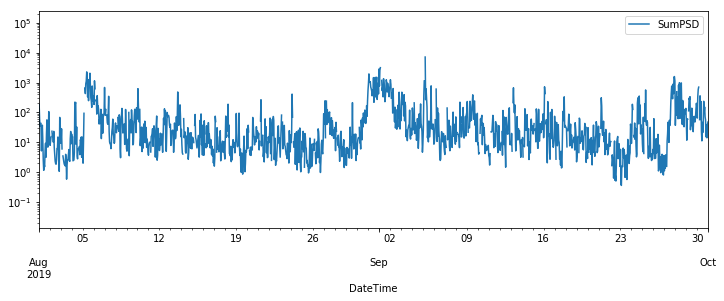

In [9]:
p_df.plot(logy=True,figsize=[12,4], xlim=['2019-08-01','2019-10-01'])

In [10]:
p_df['SumPSD'].isnull().values.any()
p_df['SumPSD'].isnull().sum()

True

1012

In [12]:
d_d = 'D:\\data\\magnetometer\\psd\\'
p_df.to_hdf(os.path.join(d_d, 'Wing_VanAllenEra_Summed_ulf_pow.h5'), key='p_df',
                mode='w',  format='table', data_columns=True, complevel=9, complib='blosc:snappy')